In [149]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t


In [150]:
# lecture fichier Eucalypcus
file = open("Downloads/Eucalyptus.csv")
csvreader = csv.reader(file)

xi = 0.0
yi = 0.0
xi2 = 0.0
xiyi= 0.0
circs = np.empty([0])
hauteurs = np.empty([0])

for row in csvreader:
    c = float(row[0])
    h = float(row[1])
    xi += c
    yi += h
    xiyi += c*h
    xi2 += c**2
    circs = np.append(circs,c)
    hauteurs = np.append(hauteurs,h)

file.close()


beta1: 9.037475668452768, beta2: 0.257137855007109


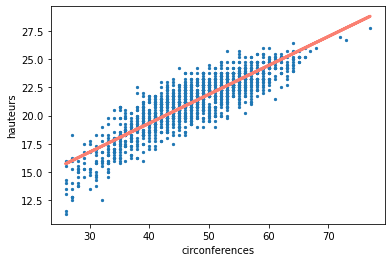

Moyenne de espilon: 5.071753607244942e-16


In [151]:
# Question 3
n = circs.size
beta1 = (xi2*yi - xi*xiyi)/(n*xi2-xi**2)
beta2 = (n*xiyi - xi*yi)/(n*xi2-xi**2)
print(f"beta1: {beta1}, beta2: {beta2}")

y = beta1+beta2*circs

plt.scatter(circs, hauteurs,s=5)
plt.plot(circs, y, color='salmon', linewidth=3)
plt.xlabel("circonferences");
plt.ylabel("hauteurs")
plt.show()

print(f"Moyenne de espilon: {np.sum(y-hauteurs)/n}")

In [160]:
#Q7
# lecture fichier Eucalypcus
file = open("Downloads/Eucalyptus.csv")
csvreader = csv.reader(file)

circs = np.empty([0,3], float)
circs1 = np.empty([0,2], float)
hauteurs = np.empty([0])


for row in csvreader:
    c = float(row[0])
    h = float(row[1])
    circs  = np.append(circs,[(1.0,c,np.sqrt(c))],axis=0)
    circs1 = np.append(circs1,[(1.0,c)],axis=0)    
    hauteurs = np.append(hauteurs,h)

file.close()


In [161]:
def calcule_beta(X, Y):
    XT = X.transpose()
    A = np.matmul(XT,X)
    A_inv = np.linalg.inv(A)
    B = np.matmul(XT,Y)
    beta = np.matmul(A_inv,B)
    return beta

print(f"Beta: {calcule_beta(circs, hauteurs)}")
print(f"Beta: {calcule_beta(circs1, hauteurs)}") # meme resultats que la regression lineaire simple 

Beta: [-24.35200327  -0.48294547   9.98688814]
Beta: [9.03747567 0.25713786]


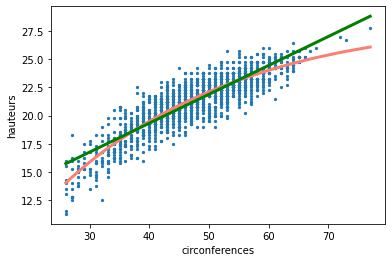

Moyenne de espilon: -5.149602407693506e-08
Moyenne de espilon: 1.5637262544625338e-10


In [163]:
# Question 7
# Tri par hauteurs
beta = calcule_beta(circs, hauteurs)
circs_sort = circs[circs[:, 1].argsort()]
y = beta[0]+beta[1]*circs_sort[:,[1]]+beta[2]*circs_sort[:,[2]]

beta1 = calcule_beta(circs1, hauteurs)
circs1_sort = circs1[circs1[:, 1].argsort()]
y1 = beta1[0]+beta1[1]*circs1_sort[:,[1]]

plt.scatter(circs[:,[1]], hauteurs,s=5)
plt.plot(circs_sort[:,[1]], y, color='salmon', linewidth=3)
plt.plot(circs_sort[:,[1]], y1, color='green', linewidth=3)
plt.xlabel("circonferences")
plt.ylabel("hauteurs")
plt.show()

y_pas_trie = beta[0]+beta[1]*circs[:,[1]]+beta[2]*circs[:,[2]]
print(f"Moyenne de espilon: {np.sum(y_pas_trie-hauteurs)/n}")
y2_pas_trie = beta1[0]+beta1[1]*circs1[:,[1]]
print(f"Moyenne de espilon: {np.sum(y2_pas_trie-hauteurs)/n}")
